# NYC Restaurant

People need ot eat. As a Chinese American, my social life revolve around a place to eat. But since I have genetic predisposition for diabeties and high blood pressure, I also need to find a safe place to eat. So I looked up NYC Restaurant health inspection data to find good places to eat.

So first I got the data from "https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/xx67-kt59"

First I used SQL to filter the data. I used 'Chinese' for CUISIN DESCRIPTION, start with 'Pre-permit' for INSPECTION TYPE to only look at inital grade, grade 'A', 'B', or 'C' to exclude empty, pending(P) or unknown (Z) grade.

And then I imported the data into Python to play with. 

In [75]:
import pandas as pd
data = pd.read_csv('NYC_Filtered.csv')

In [76]:
pd.options.display.max_rows = 6
data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41631489,FIRST HOT POT,QUEENS,4345,MAIN ST ...,11355,7188868281,Chinese,01/26/2012,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,13,A,01/26/2012,03/03/2016,Pre-permit (Operational) / Re-inspection
1,41631489,FIRST HOT POT,QUEENS,4345,MAIN ST ...,11355,7188868281,Chinese,01/26/2012,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13,A,01/26/2012,03/03/2016,Pre-permit (Operational) / Re-inspection
2,41631489,FIRST HOT POT,QUEENS,4345,MAIN ST ...,11355,7188868281,Chinese,01/26/2012,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,13,A,01/26/2012,03/03/2016,Pre-permit (Operational) / Re-inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,50045649,KING GARDEN RESTAURANT,MANHATTAN,1,W 137TH ST,10037,2128628818,Chinese,02/29/2016,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,12,A,02/29/2016,03/03/2016,Pre-permit (Operational) / Re-inspection
2868,50046161,GREEN APPLE FOOD COURT: TERIYAKI/ CHINESE FOOD,QUEENS,9245,GUY R BREWER BLVD,11433,7186588887,Chinese,02/25/2016,Violations were cited in the following area(s).,05H,"No facilities available to wash, rinse and san...",Critical,12,A,02/25/2016,03/03/2016,Pre-permit (Operational) / Initial Inspection
2869,50046161,GREEN APPLE FOOD COURT: TERIYAKI/ CHINESE FOOD,QUEENS,9245,GUY R BREWER BLVD,11433,7186588887,Chinese,02/25/2016,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,12,A,02/25/2016,03/03/2016,Pre-permit (Operational) / Initial Inspection


In [77]:
data['PHONE']

0       7188868281
1       7188868281
2       7188868281
           ...    
2867    2128628818
2868    7186588887
2869    7186588887
Name: PHONE, dtype: object

Checked column 6 or PHONE, need to convert into numbers

For now we can treat it like text.

In [78]:
# grade are similar to the same date, multiple lines indicate multiple violations
# dropped duplicate DBA names

data.drop_duplicates(subset = 'DBA', inplace = True)

In [79]:
data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41631489,FIRST HOT POT,QUEENS,4345,MAIN ST ...,11355,7188868281,Chinese,01/26/2012,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,13,A,01/26/2012,03/03/2016,Pre-permit (Operational) / Re-inspection
3,41636803,WOK N ROLL KITCHEN,BROOKLYN,1821,CHURCH AVENUE,11226,7182821188,Chinese,04/09/2012,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,13,A,04/09/2012,03/03/2016,Pre-permit (Operational) / Re-inspection
6,41639905,NY DOUBLE CHINESE RESTAURANT,QUEENS,5316,108TH ST,11368,7187601021,Chinese,02/24/2012,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,12,A,02/24/2012,03/03/2016,Pre-permit (Operational) / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,50045571,WING YUM LIN'S RESTAURANT,QUEENS,11021,JAMAICA AVE,11418,7188059868,Chinese,02/16/2016,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,7,A,02/16/2016,03/03/2016,Pre-permit (Operational) / Initial Inspection
2866,50045649,KING GARDEN RESTAURANT,MANHATTAN,1,W 137TH ST,10037,2128628818,Chinese,02/29/2016,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,12,A,02/29/2016,03/03/2016,Pre-permit (Operational) / Re-inspection
2868,50046161,GREEN APPLE FOOD COURT: TERIYAKI/ CHINESE FOOD,QUEENS,9245,GUY R BREWER BLVD,11433,7186588887,Chinese,02/25/2016,Violations were cited in the following area(s).,05H,"No facilities available to wash, rinse and san...",Critical,12,A,02/25/2016,03/03/2016,Pre-permit (Operational) / Initial Inspection


Now look at the zipcodes containing the highest number of restaurants

In [80]:
# create a dictionary with all the zipcodes
count_zip = dict((zip, 0) for zip in data['ZIPCODE'])

In [81]:
# tally the number of Chinese restaurants in that zip code
for i in data['ZIPCODE']:
    count_zip[i] += 1

count_zip

{10001: 2,
 10002: 52,
 10003: 4,
 10004: 1,
 10007: 1,
 10009: 7,
 10010: 5,
 10011: 3,
 10012: 2,
 10013: 22,
 10016: 6,
 10017: 5,
 10018: 7,
 10019: 6,
 10021: 3,
 10022: 4,
 10023: 2,
 10024: 1,
 10025: 11,
 10026: 2,
 10027: 5,
 10028: 1,
 10029: 14,
 10030: 1,
 10031: 6,
 10032: 7,
 10033: 5,
 10034: 3,
 10035: 5,
 10036: 6,
 10037: 4,
 10038: 6,
 10039: 2,
 10040: 2,
 10044: 1,
 10128: 4,
 10281: 1,
 10301: 1,
 10302: 7,
 10303: 4,
 10304: 6,
 10305: 5,
 10306: 3,
 10307: 1,
 10308: 3,
 10309: 3,
 10310: 2,
 10312: 4,
 10314: 4,
 10451: 7,
 10452: 5,
 10453: 7,
 10454: 7,
 10455: 4,
 10456: 8,
 10457: 5,
 10458: 9,
 10459: 4,
 10460: 4,
 10461: 4,
 10462: 4,
 10463: 2,
 10464: 1,
 10465: 3,
 10466: 6,
 10467: 13,
 10468: 8,
 10469: 5,
 10470: 1,
 10471: 2,
 10472: 5,
 10473: 3,
 10474: 1,
 10475: 4,
 11004: 1,
 11101: 4,
 11102: 3,
 11103: 2,
 11104: 4,
 11105: 2,
 11106: 4,
 11201: 3,
 11203: 7,
 11204: 14,
 11205: 7,
 11206: 6,
 11207: 10,
 11208: 5,
 11209: 10,
 11210: 13,
 

In [82]:
# get sorted results using a list of tuples

import operator
sorted_zip = sorted(count_zip.items(), key=operator.itemgetter(1), reverse = True)

sorted_zip

[(11354, 65),
 (11220, 54),
 (11355, 52),
 (10002, 52),
 (10013, 22),
 (11214, 19),
 (10029, 14),
 (11204, 14),
 (11212, 14),
 (11373, 13),
 (11377, 13),
 (10467, 13),
 (11210, 13),
 (11226, 13),
 (11368, 12),
 (11221, 12),
 (10025, 11),
 (11207, 10),
 (11209, 10),
 (11229, 10),
 (11236, 10),
 (11385, 9),
 (11432, 9),
 (10458, 9),
 (11211, 9),
 (11213, 9),
 (11216, 9),
 (11219, 9),
 (11223, 9),
 (11435, 8),
 (10456, 8),
 (10468, 8),
 (11232, 8),
 (11234, 8),
 (11237, 8),
 (10302, 7),
 (11372, 7),
 (10451, 7),
 (10453, 7),
 (10454, 7),
 (10009, 7),
 (10018, 7),
 (10032, 7),
 (11203, 7),
 (11205, 7),
 (10304, 6),
 (11356, 6),
 (11361, 6),
 (11378, 6),
 (11417, 6),
 (11419, 6),
 (11434, 6),
 (10466, 6),
 (10016, 6),
 (10019, 6),
 (10031, 6),
 (10036, 6),
 (10038, 6),
 (11691, 6),
 (11206, 6),
 (11225, 6),
 (10305, 5),
 (11366, 5),
 (10452, 5),
 (10457, 5),
 (10469, 5),
 (10472, 5),
 (10010, 5),
 (10017, 5),
 (10027, 5),
 (10033, 5),
 (10035, 5),
 (11208, 5),
 (11215, 5),
 (10303, 4),
 (10

With a few google map look ups, 11354 and 11355 are in Flushing, Queens, which is where the "New Chinatown" is at. 11220 is in Sunset Park, Brooklyn and 11214 is in Bensonhurst, Brooklyn, which I previously not too familar with. The "old Chinatown" is located near 10002, 10013.

Now for each zip code, calculate the percentage of A, B, and C grade. 

In [198]:
# make a dataframe with the sorted zip code as index, and add grade A, B, C as columns
ratio = pd.DataFrame(0, index = [x[0] for x in sorted_zip], columns=['A', 'B', 'C', 'Total', 'Percent A', 'Percent B', 'Percent C'])

In [199]:
# make a dictionary with the index of data as the value, so each field in dataframe is properly accessed

data_index = dict((index, 0) for index in range (1, len(data['ZIPCODE'])))
for k,v in enumerate(list(data.index)):
    data_index[k] = data.index[k]

In [200]:
for k,v in enumerate(data['ZIPCODE']):
        if data['GRADE'][data_index[k]] == 'A':
            ratio['A'][v] += 1
        elif data['GRADE'][data_index[k]] == 'B':
            ratio['B'][v] += 1
        elif data['GRADE'][data_index[k]] == 'C':
            ratio['C'][v] += 1

In [262]:
#change the type of variable in the ratio columns to float
ratio['Percent A']=ratio['Percent A'].astype(float)
ratio['Percent B']=ratio['Percent B'].astype(float)
ratio['Percent C']=ratio['Percent C'].astype(float)

In [263]:
# tally the total and calculate percentages
for k,v in enumerate(ratio['A']):
    index = ratio.index[k]
    ratio['Total'][index] = ratio['A'][index]+ratio['B'][index]+ratio['C'][index]
    ratio['Percent A'][index] = float(ratio['A'][index]) / float(ratio['Total'][index])
    ratio['Percent B'][index] = float(ratio['B'][index]) / float(ratio['Total'][index])
    ratio['Percent C'][index] = float(ratio['C'][index]) / float(ratio['Total'][index])

D:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the ca

In [290]:
pd.options.display.max_rows = 100
ratio.head(10)

,A,B,C,Total,Percent A,Percent B,Percent C
11354,42,21,2,65,0.646154,0.323077,0.030769
11220,36,15,3,54,0.666667,0.277778,0.055556
11355,35,12,5,52,0.673077,0.230769,0.096154
10002,35,14,3,52,0.673077,0.269231,0.057692
10013,16,6,0,22,0.727273,0.272727,0.000000
11214,16,3,0,19,0.842105,0.157895,0.000000
10029,13,1,0,14,0.928571,0.071429,0.000000
11204,10,3,1,14,0.714286,0.214286,0.071429
11212,10,4,0,14,0.714286,0.285714,0.000000
11373,9,2,2,13,0.692308,0.153846,0.153846


In [356]:
# try to select the values that are not 1, and only empty in either B or C.

top_ratio = ratio[ratio['Total'] > 10]
no_singles = ratio[ratio['A']!=1]
#no_singles = no_singles[no_singles['B']!=1]
#no_singles = no_singles[no_singles['C']!=1]

for k,v in enumerate(ratio['B']):
    index = ratio.index.values[k]
    print index
    if no_singles['C'][index] == 0 or v == 0:
        no_singles = no_singles.drop(index)

11354
11220
11355
10002
10013
11214
10029
11204
11212
11373
11377
10467
11210
11226
11368
11221
10025
11207
11209
11229
11236
11385
11432
10458
11211
11213
11216
11219
11223
11435
10456
10468
11232
11234
11237
10302
11372
10451
10453
10454
10009
10018
10032
11203
11205
10304
11356
11361
11378
11417
11419
11434
10466
10016
10019
10031
10036
10038
11691
11206
11225
10305
11366
10452
10457
10469
10472
10010
10017
10027
10033
10035
11208
11215
10303
10312
10314
11358
11362
11411
11412
11418
10455
10459
10460
10461
10462
10475
10003
10022
10037
11101
11104


KeyError: 11104L

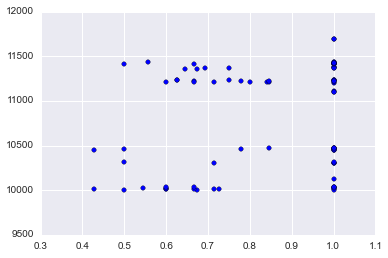

In [333]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.plt.scatter(no_singles['Percent A'], no_singles.index)
#sns.plt.scatter(top_ratio['Percent B'], top_ratio.index)
#sns.plt.scatter(top_ratio['Percent C'], top_ratio.index)

In [336]:
ratio.head(10)

,A,B,C,Total,Percent A,Percent B,Percent C
11354,42,21,2,65,0.646154,0.323077,0.030769
11220,36,15,3,54,0.666667,0.277778,0.055556
11355,35,12,5,52,0.673077,0.230769,0.096154
10002,35,14,3,52,0.673077,0.269231,0.057692
10013,16,6,0,22,0.727273,0.272727,0.000000
11214,16,3,0,19,0.842105,0.157895,0.000000
10029,13,1,0,14,0.928571,0.071429,0.000000
11204,10,3,1,14,0.714286,0.214286,0.071429
11212,10,4,0,14,0.714286,0.285714,0.000000
11373,9,2,2,13,0.692308,0.153846,0.153846


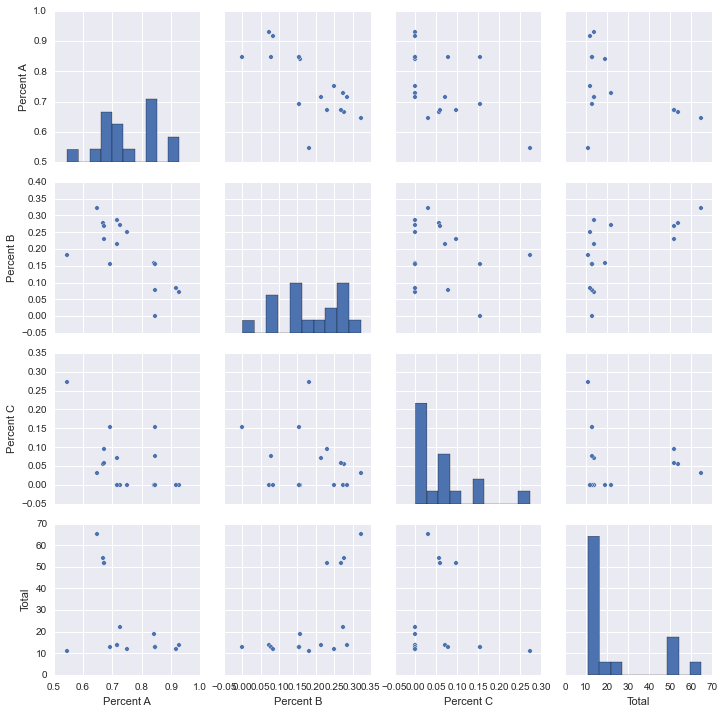

In [310]:
sns.pairplot(top_ratio, vars=["Percent A", "Percent B", "Percent C", "Total"])

In [313]:
top_ratio.to_csv('sorted.csv', sep=',')

In [341]:
no_singles

,A,B,C,Total,Percent A,Percent B,Percent C
11354,42,21,2,65,0.646154,0.323077,0.030769
11220,36,15,3,54,0.666667,0.277778,0.055556
11355,35,12,5,52,0.673077,0.230769,0.096154
10002,35,14,3,52,0.673077,0.269231,0.057692
10013,16,6,0,22,0.727273,0.272727,0.000000
11214,16,3,0,19,0.842105,0.157895,0.000000
11212,10,4,0,14,0.714286,0.285714,0.000000
11373,9,2,2,13,0.692308,0.153846,0.153846
10467,11,2,0,13,0.846154,0.153846,0.000000
11210,11,0,2,13,0.846154,0.000000,0.153846


11220